In [12]:
import pandas as pd
import numpy as np
from functions.Strategy import *
from functions.UtilsCreateDataFrame import *
from functions.UtilsGoogleDrive import *
import time
import json
import joblib
import warnings


In [13]:
api = "5891552027:AAH6zfvZu-fTvqb9vMmd-95hVjecNRQD6BA"
import requests
import json
def getMe(api):
    url = f"https://api.telegram.org/bot{api}/getMe"
    headers = {"accept": "application/json"}
    response = requests.post(url, headers=headers)
    return json.loads(response.text)

def sendMessage(api, text):
    url = f"https://api.telegram.org/bot{api}/sendMessage"

    payload = {
        "text": text,
        "disable_web_page_preview": False,
        "disable_notification": False,
        "reply_to_message_id": None,
        "chat_id": "@djoleeeeeeeeee"
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json"
    }

    response = requests.post(url, json=payload, headers=headers)

    return json.loads(response.text)

def getUpdate(api):
    url = f"https://api.telegram.org/bot{api}/getUpdates"

    payload = {
        "offset": 1000,
        "limit": 100,
        "timeout": 0
    }
    headers = {
        "accept": "application/json",
        "content-type": "application/json"
    }

    response = requests.post(url, json=payload, headers=headers)

    return json.loads(response.text)

In [16]:
def run(asset_name_1, asset_name_2, api):
        msg = f"running {asset_name_1} {asset_name_2}"
        _ = sendMessage(api, msg)
        
        
        warnings.simplefilter(action="ignore", category=FutureWarning)
        warnings.simplefilter(action="ignore", category=UserWarning)

        with open("config/config.json") as json_file:
                config = json.load(json_file)

        drive = config["drive"]
        idx = config["idx"]
        path = "H:\AllTickers_trades_weighted_2020-12_2021-12.csv.gz"
        coin_df = loadCleanDataFrame(path)

        if drive:
            id_ = "1Vg9w6RpPjukasvRqxM4cqPxabDi9MeyS"
            folder_name, id_pair = CreatePairFolder(id_, (asset_name_1, asset_name_2))

        msg = f"calculate beta table"
        _ = sendMessage(api, msg)
        
        beta_table, path_beta = create_beta_table(
            coin_df=coin_df,
            asset_name_1=asset_name_1,
            asset_name_2=asset_name_2,
            calibration_window=config["calibration_window"],
            frequency=config["frequency"],
            safe_output_csv=True,
            n_job=4,
            output_folder="H:",
            stat_test=config["stat_test"],
        )

        if drive:
            UploadFile(file=path_beta, folder_id=id_pair)

        msg = f"calculate results"
        _ = sendMessage(api, msg)
        result = getCombRet(
            coin_df=coin_df,
            asset_name_1=asset_name_1,
            asset_name_2=asset_name_2,
            trading_windows=config["tresh"],
            calib_window=config["calibration_window"],
            p_values=config["p_values"],
            stop_loss=config["stop_loss"],
            stat_test=config["stat_test"],
            safe_beta_csv=True,
            input_folder="H:",
            output_folder_beta="H:",
            drive=drive,
        )

        msg = f"plotting results"
        _ = sendMessage(api, msg)
        SaveUploadResultStrategy(
            result, asset_name_1, asset_name_2, drive=drive, output_folder="H:", idx=idx
        )

        CreatePlot(
            result,
            asset_name_1=asset_name_1,
            asset_name_2=asset_name_2,
            to_save=True,
            visualize = True,
            output_folder="H:",
            drive=True,
            idx=idx,
            dpi=80,
        )

Beta Table Loaded


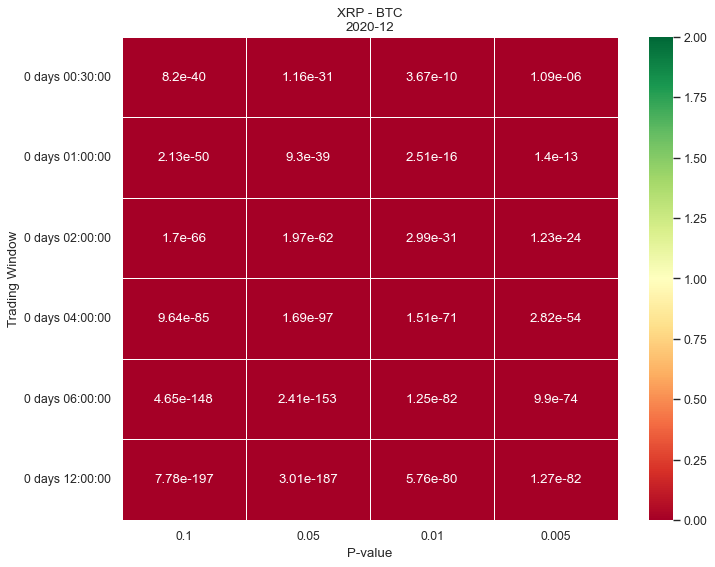

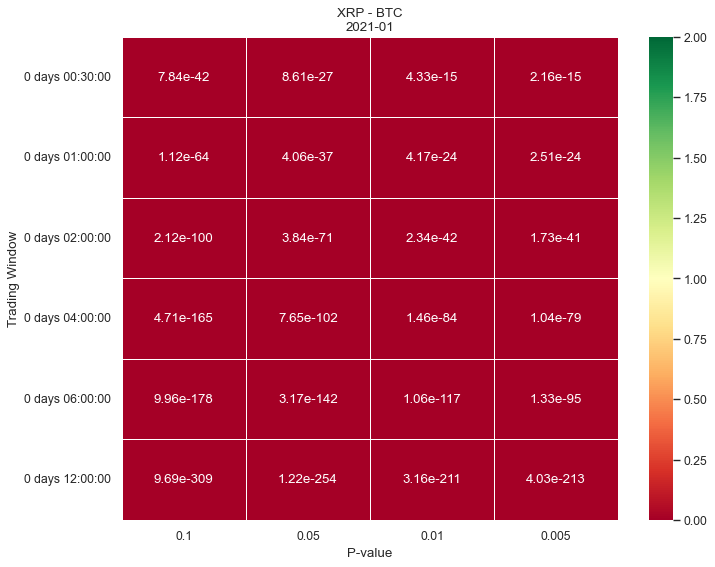

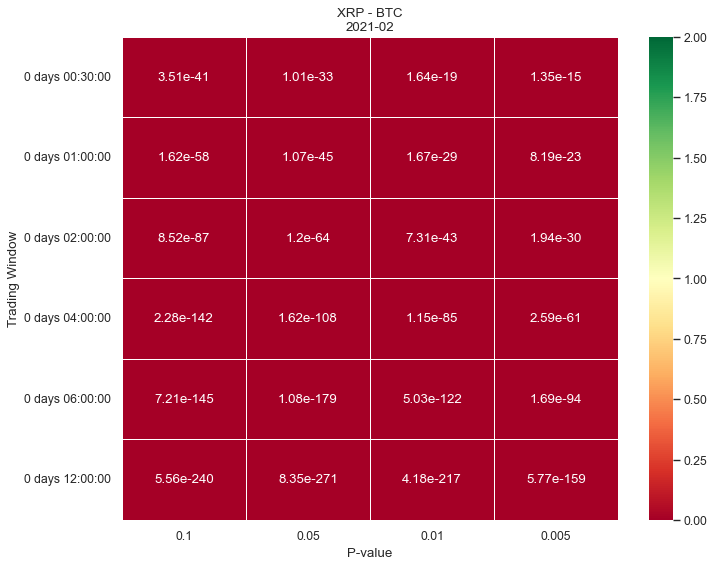

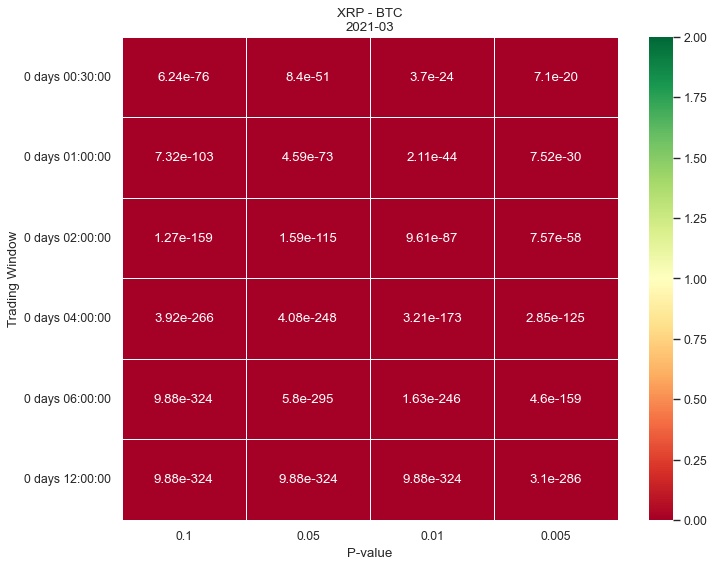

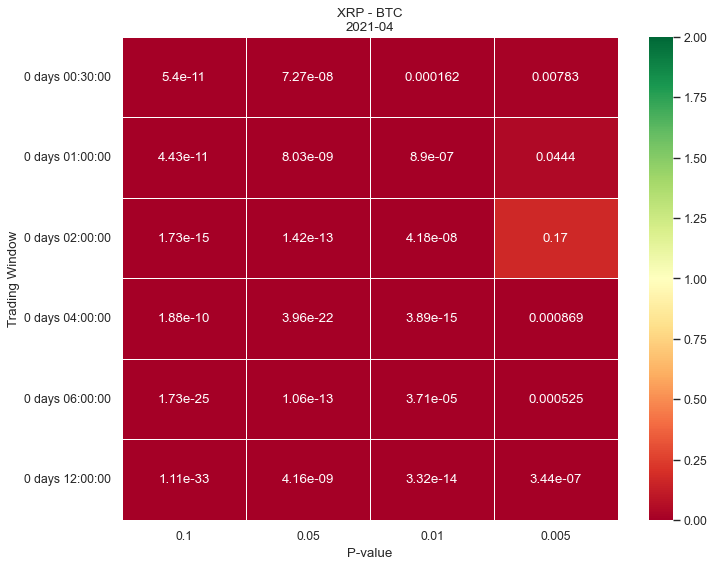

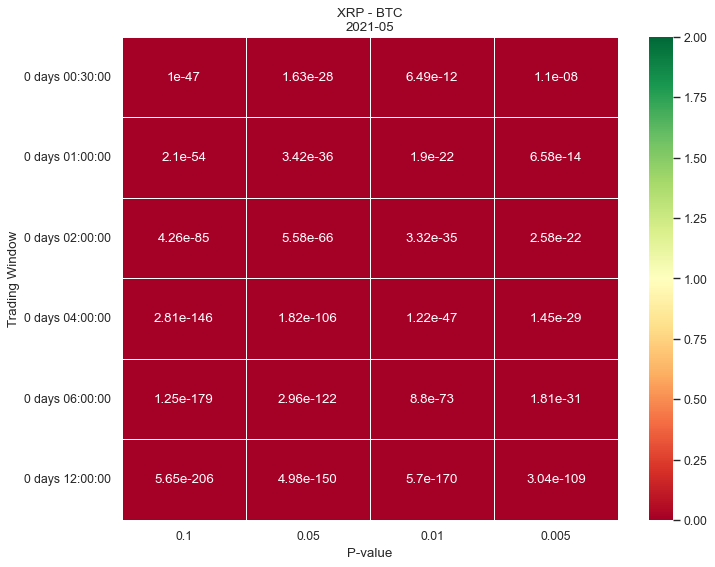

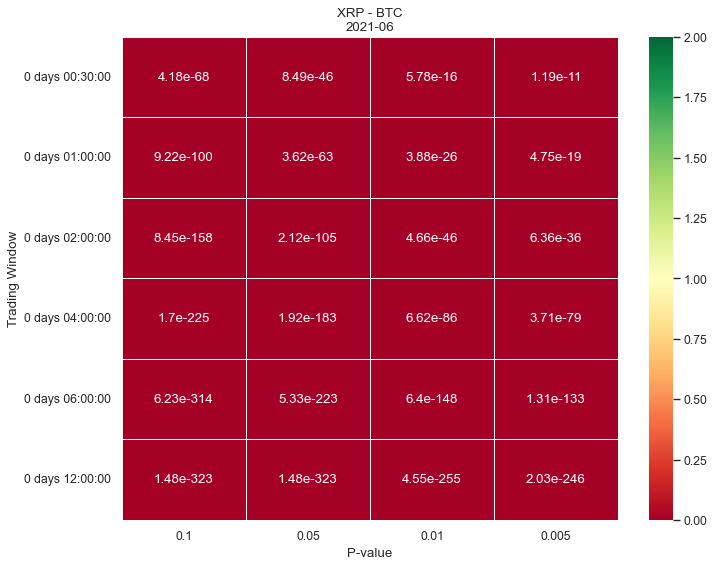

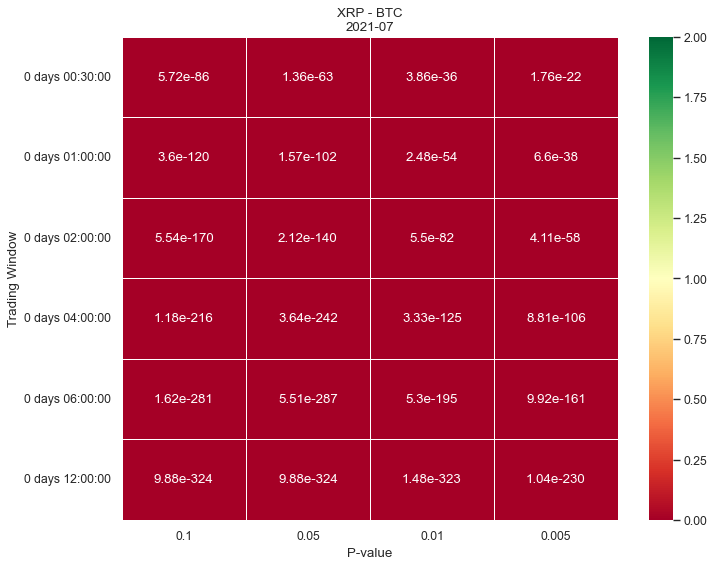

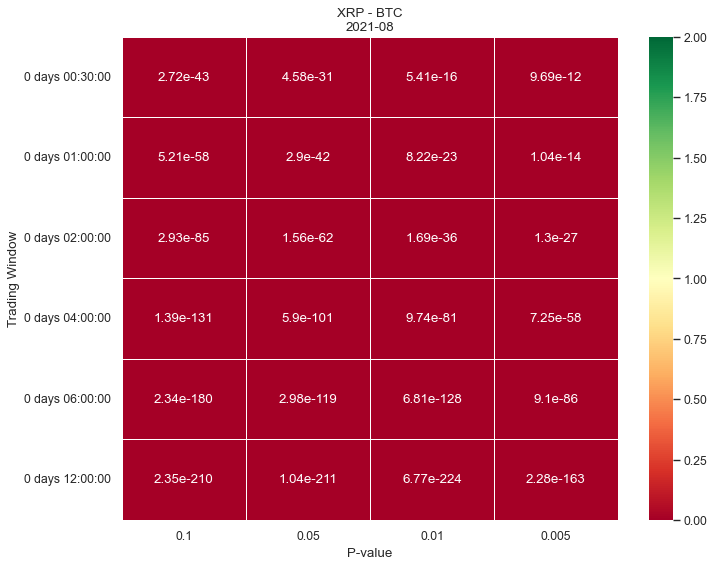

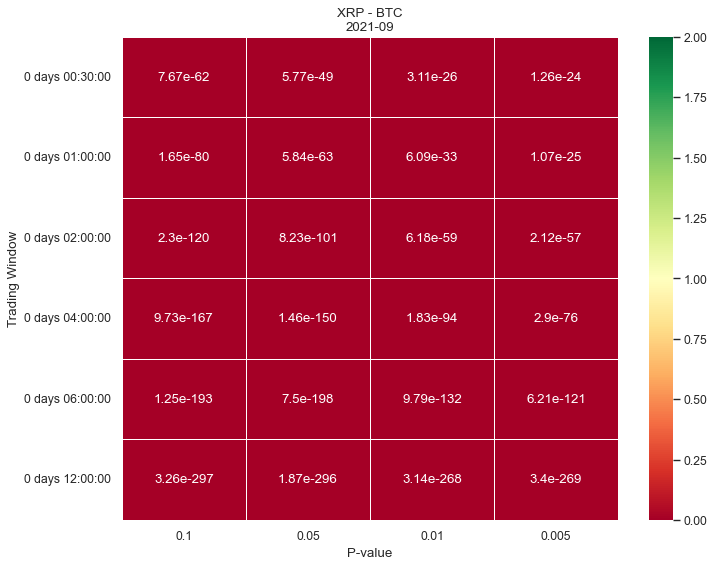

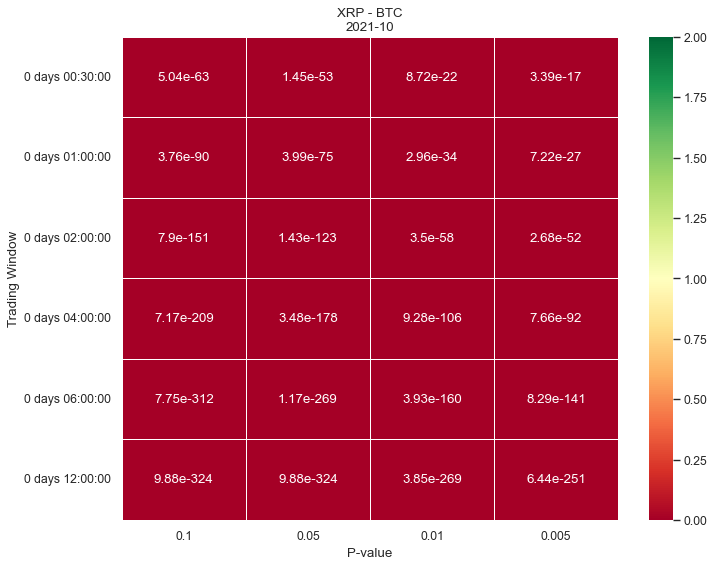

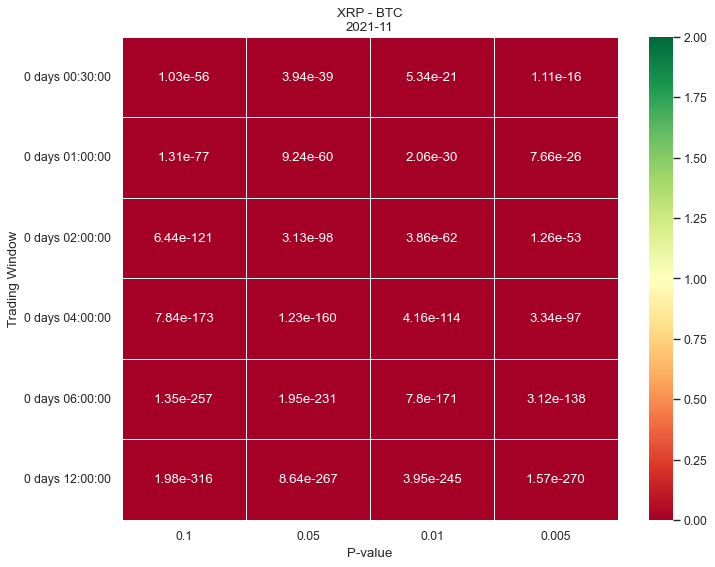

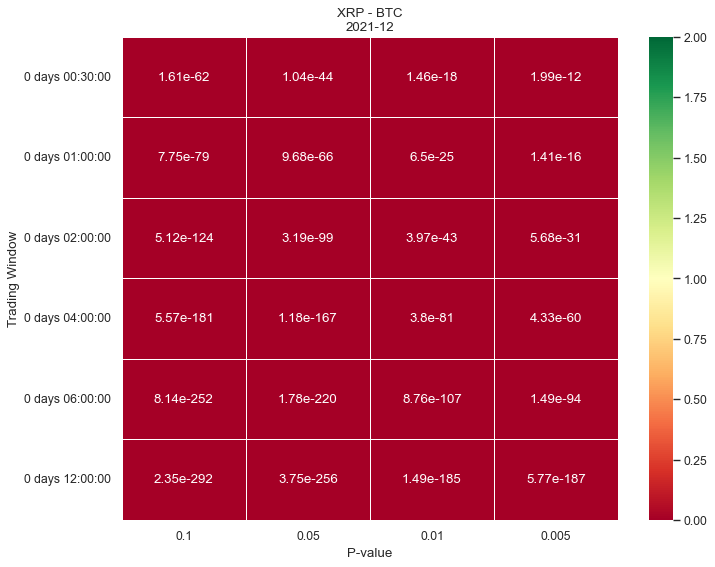

KeyboardInterrupt: 

In [17]:
import time
update = getUpdate(api)
last_id = update["result"][-1]["channel_post"]["message_id"]
for pair in pairs:
        message = f"can I run {pair}?"
        _ = sendMessage(api, message)           
        time.sleep(5)

        while True:
            res = getUpdate(api)
            time.sleep(1)
            id_ = res["result"][-1]["channel_post"]["message_id"]
            if id_ == last_id:
                pass
            
            else:
                msg = res["result"][-1]["channel_post"]["text"]
                last_id = res["result"][-1]["channel_post"]["message_id"]
                break
        if msg == "Yes":
            run(pair[0], pair[1], api)
            last_id = update["result"][-1]["channel_post"]["message_id"]
        else:
            pass 
        